In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

/var/folders/8j/skd2y7rd5k752cwx0v97h73c0000gn/T/ipykernel_59283/3671567433.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv("CSV/cost-revenue-clean.csv")
data

,production_budget_usd,worldwide_gross_usd
0,1000000,26
1,10000,401
2,400000,423
3,750000,450
4,10000,527
...,...,...
5029,225000000,1519479547
5030,215000000,1671640593
5031,306000000,2058662225
5032,200000000,2207615668


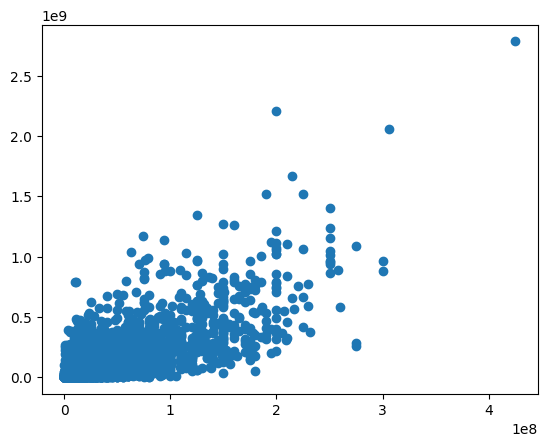

In [4]:
plt.scatter(data.production_budget_usd, data.worldwide_gross_usd)

In [6]:
data.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


(0.0, 450000000.0)

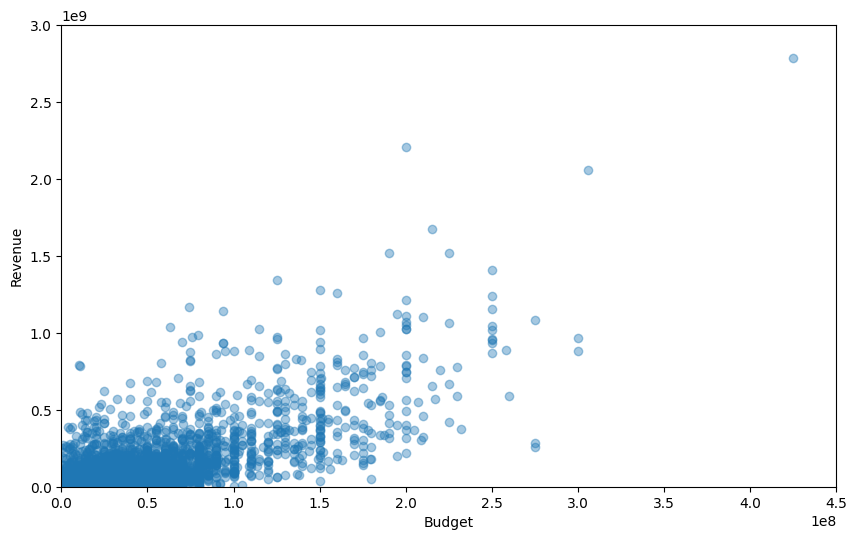

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(data.production_budget_usd, data.worldwide_gross_usd, alpha=0.4)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)

In [9]:
model = LinearRegression()
x = pd.DataFrame(data.production_budget_usd) #данные на основе которых будет предсказание
y = pd.DataFrame(data.worldwide_gross_usd)  #данные которые надо предсказать
model.fit(x, y) #обучение модели

LinearRegression()

In [16]:
model.coef_
print(model.coef_)
print(f"на каждый 1$ который инвестируется получаем {round(model.coef_[0][0], 2)}$ кассовых сборов")

[[3.11150918]]
на каждый 1$ который инвестируется получаем 3.11$ кассовых сборов


In [21]:
model.intercept_
print(model.intercept_)
print(f"если наш бюджет равен 1000$ изпасходованных средств мы получим приыбль/убыток = {round(model.intercept_[0], 2)}$")
print("В данном случае это убыток, так как данная модель очень простая")

[-7236192.72913988]
если наш бюджет равен 1000$ изпасходованных средств мы получим приыбль/убыток = -7236192.73$
В данном случае это убыток, так как данная модель очень простая


(0.0, 450000000.0)

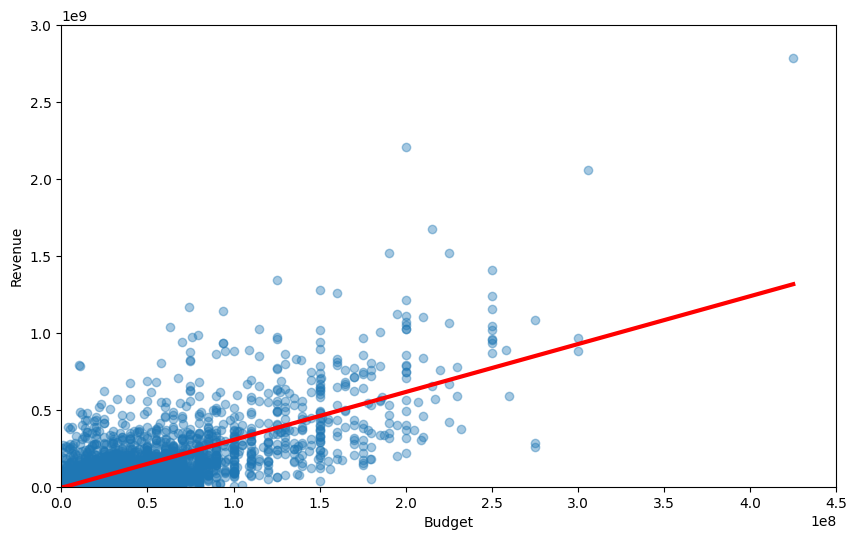

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(data.production_budget_usd, data.worldwide_gross_usd, alpha=0.4)

#model.predict(x) передаем обученной модели 'x', чтобы предсказать 'y' для рисования линии
plt.plot(x, model.predict(x), color='red', linewidth=3)  

plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)

In [26]:
model.score(x, y)
print(f"Точность можели составляет = {model.score(x,y)}. Чем выше тем точнее модель")

Точность можели составляет = 0.5496485356985729. Чем выше тем точнее модель


In [34]:
# Пример, если инвесторы вложат 20 000 000 сколько заработают
print(f"Если вложат 20млн кассовый сбор сотавит по прогнозу = {round(model.predict([[20000000]])[0][0], 2)}")


Если вложат 20млн кассовый сбор сотавит по прогнозу = 54993990.93


/Users/iqazaq/coding/SelfEducation/EDA/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
